<ipython-input-1-b80178352ef9>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-1-b80178352ef9>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

✅ Accuracy: 0.8212290502793296


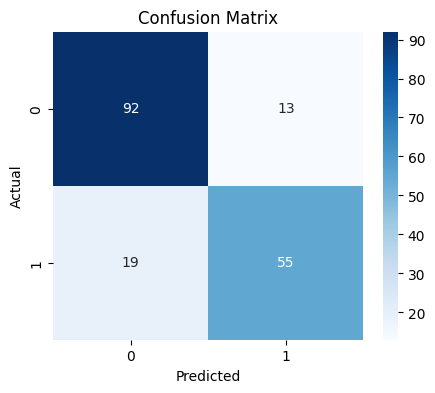


🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



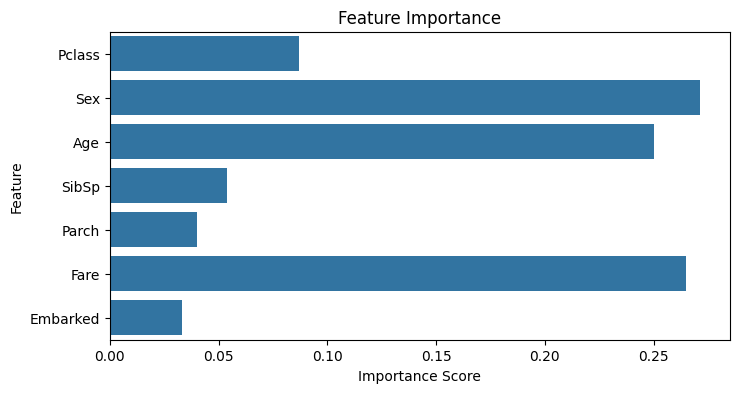

In [1]:
# 🛠️ Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📥 Load Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 🧹 Data Preprocessing
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# 🔤 Encode Categorical Features
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

# 🎯 Define Features and Target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Train a Classification Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Make Predictions
y_pred = model.predict(X_test)

# ✅ Evaluate the Model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# 📊 Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🧾 Classification Report
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

# 📉 Feature Importance Plot
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
